In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    provided = ['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV']
    quote = Quote([b.symbol if b.symbol not in mappings else mappings[b.symbol]
                   for b in Instrument.find_stocks(100)] + provided, 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-26 to 2019-06-06'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 12) & (stat['21-mean'] > 1.2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
KO,50,3.467480,1.311880,2.507772,3.383611
BXMT,50,2.305516,1.214537,1.752052,2.677343
SHOP,50,14.843247,9.550457,1.535598,6.171438
ZNGA,50,6.991839,4.690377,1.452816,4.700161
NTDOY,50,10.223728,7.101290,1.414693,7.386100
SBUX,50,3.975454,2.765608,1.373250,4.600183
SPLV,50,1.548317,1.044365,1.312504,1.971361
V,50,3.126814,2.312197,1.275510,4.317938
ENPH,50,25.626499,20.047631,1.269423,6.875388


In [3]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 7, provided)

['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'SHOP'] 14.946948954603648 22.634651748184698 7.1121796171774765 -14.799882410758528
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'ZNGA'] 11.864911227178418 18.168520206722558 7.441317092206484 -13.744926071750626
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'NTDOY'] 11.649873135191312 17.243874209312263 8.112801795640529 -13.70680286976148
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'DIS'] 10.98251850988342 16.226694564253044 7.799295957811278 -13.043472012180903
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'WMT'] 10.493728163974943 16.383662045041866 7.102078371905973 -12.992012252972899


['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'WMT']

In [4]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 7, provided + ['NTDOY'])

['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'NTDOY', 'KO'] 17.003936863936524 24.267068925671108 7.415845100721693 -14.67897716245628
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'NTDOY', 'SHOP'] 11.649873135191312 17.243874209312263 8.112801795640529 -13.70680286976148
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'NTDOY', 'ZNGA'] 11.609567091651035 17.488605339348712 7.744982575750701 -13.624020823448378


['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'NTDOY', 'ZNGA']

In [5]:
quote.setup_mask(['NTDOY', 'ZNGA'])
quote.find_optimal_ratio(21, 8)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 NTDOY    0.315655
 ZNGA     0.684345
 dtype: float64, 8.012, 3.7838)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,50.0,7.930666,3.773026,1.152071,4.876505,8.062239,10.460070,16.626325,2.054871,4.686736
ZNGA,50.0,6.991839,4.690377,-1.129942,3.477169,5.690401,10.743593,17.904763,1.452816,4.700161
NTDOY,50.0,10.223728,7.101290,-1.587664,4.247562,9.809697,14.693490,27.448683,1.414693,7.386100


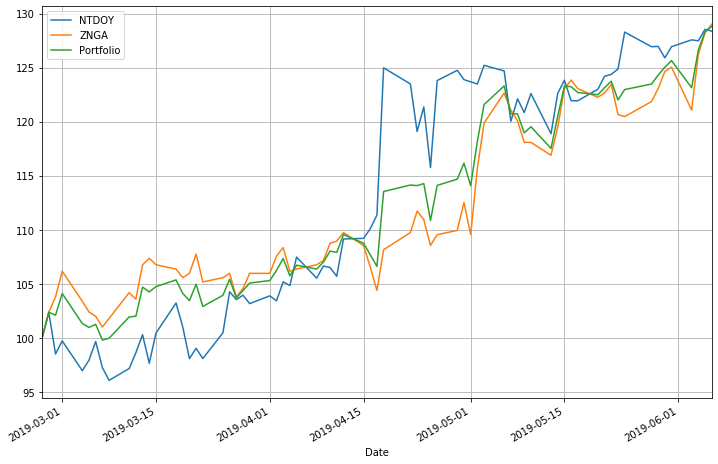

In [6]:
quote.graph(21, {'NTDOY': .32, 'ZNGA': .68})